In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
# Loading the data from csv file to a Pandas DataFrame
data = pd.read_csv("C:/Users/Ashwini/Electric_Vehicle_Population_Data.csv")
data.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,WA1AAAGE2M,Kitsap,POULSBO,WA,98370,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,23.0,148815901,POINT (-122.63339300000001 47.748427)
1,WBY8P2C00L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,132197810,POINT (-122.303413 47.61065)
2,5YJXCBE21K,Cowlitz,SILVERLAKE,WA,98645,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,20.0,154341673,POINT (-122.772699 46.320526)
3,1FTZR081XY,King,SEATTLE,WA,98117,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,36.0,169378338,POINT (-122.379354 47.687571)
4,WBY1Z6C55H,King,SEATTLE,WA,98119,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,36.0,192605101,POINT (-122.36772100000002 47.639264)


In [3]:
data.shape

(79767, 15)

In [4]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79767 entries, 0 to 79766
Data columns (total 15 columns):
VIN (1-10)                                           79767 non-null object
County                                               79762 non-null object
City                                                 79767 non-null object
State                                                79767 non-null object
ZIP Code                                             79767 non-null int64
Model Year                                           79767 non-null int64
Make                                                 79767 non-null object
Model                                                79767 non-null object
Electric Vehicle Type                                79767 non-null object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    79767 non-null object
Electric Range                                       79767 non-null int64
Base MSRP                                            79767 non-null i

In [6]:
data.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,79767.000000,79767.000000,79767.000000,79767.000000,79621.000000,7.976700e+04
mean,98175.310717,2017.628593,124.564657,2944.268244,30.155951,2.000605e+08
std,2421.827066,2.575634,102.889970,13198.091967,14.581692,1.186443e+08
min,1731.000000,1993.000000,0.000000,0.000000,1.000000,4.385000e+03
25%,98052.000000,2016.000000,25.000000,0.000000,20.000000,1.284644e+08
50%,98121.000000,2018.000000,84.000000,0.000000,34.000000,1.611321e+08
75%,98370.000000,2020.000000,215.000000,0.000000,43.000000,2.556447e+08
max,99403.000000,2022.000000,337.000000,845000.000000,49.000000,4.792548e+08


In [7]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   0
State                                                  0
ZIP Code                                               0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 146
DOL Vehicle ID                                         0
Vehicle Location                                       4
dtype: int64

In [8]:
for column in ['Model','County','Electric Vehicle Type','Electric Range','Model Year']:
    print(column,':',data[column].unique())

Model : ['E-TRON' 'I3' 'MODEL X' 'RANGER' 'TAYCAN' 'MODEL 3' 'NIRO' 'MODEL S'
 'LEAF' 'MODEL Y' 'FOCUS' 'C-MAX' 'X3' 'FUSION' 'PACIFICA' 'BOLT EV'
 'PRIUS PRIME' 'CAYENNE' 'VOLT' 'E-GOLF' 'OPTIMA PLUG-IN HYBRID' '500'
 'XC90' 'SPARK' 'A3' 'IONIQ' 'XC40' 'SONATA PLUG-IN HYBRID'
 'FORTWO ELECTRIC DRIVE' 'SOUL' 'RAV4 PRIME' 'MACH-E' 'ID.4' 'CLARITY'
 '530E XDRIVE' 'I-MIEV' 'OUTLANDER' 'NIRO PLUG-IN HYBRID' 'PRIUS PLUG-IN'
 'X5' 'F-150' 'COUNTRYMAN' 'KONA' 'WRANGLER' 'FORTWO' 'RAV4' '530E'
 'I-PACE' 'XC60 AWD PHEV' 'XC60' 'OPTIMA' 'NIRO ELECTRIC' '330E' 'I8'
 'GLE-CLASS' 'Q5 E' 'S-10 PICKUP' 'B-CLASS' 'HARDTOP' 'SONATA' 'S90'
 'KONA ELECTRIC' 'XC60 AWD' 'EQ FORTWO' 'XC90 AWD' 'E-TRON SPORTBACK'
 'PANAMERA' 'TRANSIT CONNECT ELECTRIC' 'CROSSTREK HYBRID AWD' 'C-CLASS'
 'GLC-CLASS' 'S60' 'AVIATOR' '740E XDRIVE' 'ROADSTER' 'ELR' 'KARMA'
 'S-CLASS' '918 SPYDER' 'RANGE ROVER SPORT' 'CT6' 'PS2' '745E' 'ACCORD'
 'RANGE ROVER' 'A7' 'XC90 AWD PHEV' 'CITY' 'BENTAYGA HYBRID' 'LIFE' 'A8 E'
 'CARAVAN' 'P

In [9]:
data.corr()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
ZIP Code,1.000000,0.001275,-0.006432,-0.001268,-0.443371,-0.004695
Model Year,0.001275,1.000000,0.150244,-0.209963,0.031225,-0.103490
Electric Range,-0.006432,0.150244,1.000000,0.022229,0.054758,0.015837
Base MSRP,-0.001268,-0.209963,0.022229,1.000000,0.007075,0.003016
Legislative District,-0.443371,0.031225,0.054758,0.007075,1.000000,-0.001817
DOL Vehicle ID,-0.004695,-0.103490,0.015837,0.003016,-0.001817,1.000000


In [10]:

column_to_remove = 'VIN (1-10)'

# Drop the specified column
df = data.drop(columns=[column_to_remove])



In [11]:
df.head()

,County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,Kitsap,POULSBO,WA,98370,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,23.0,148815901,POINT (-122.63339300000001 47.748427)
1,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,132197810,POINT (-122.303413 47.61065)
2,Cowlitz,SILVERLAKE,WA,98645,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,20.0,154341673,POINT (-122.772699 46.320526)
3,King,SEATTLE,WA,98117,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,36.0,169378338,POINT (-122.379354 47.687571)
4,King,SEATTLE,WA,98119,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,36.0,192605101,POINT (-122.36772100000002 47.639264)


In [12]:
column_to_remove = 'County'

# Drop the specified column
df = df.drop(columns=[column_to_remove])



In [13]:
df.head()

,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,POULSBO,WA,98370,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,23.0,148815901,POINT (-122.63339300000001 47.748427)
1,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,132197810,POINT (-122.303413 47.61065)
2,SILVERLAKE,WA,98645,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,20.0,154341673,POINT (-122.772699 46.320526)
3,SEATTLE,WA,98117,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,36.0,169378338,POINT (-122.379354 47.687571)
4,SEATTLE,WA,98119,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,36.0,192605101,POINT (-122.36772100000002 47.639264)


In [14]:
column_to_remove = 'Vehicle Location'

# Drop the specified column
df = df.drop(columns=[column_to_remove])



In [15]:
df.head()

,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,POULSBO,WA,98370,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,23.0,148815901
1,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,132197810
2,SILVERLAKE,WA,98645,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,20.0,154341673
3,SEATTLE,WA,98117,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,36.0,169378338
4,SEATTLE,WA,98119,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,36.0,192605101


In [16]:
le = preprocessing.LabelEncoder()

df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['ZIP Code'] = le.fit_transform(df['ZIP Code'])
df['Model Year'] = le.fit_transform(df['Model Year'])
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Electric Vehicle Type'] = le.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = le.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
df['Electric Range'] = le.fit_transform(df['Electric Range'])
df['Base MSRP'] = le.fit_transform(df['Base MSRP'])
df['Legislative District'] = le.fit_transform(df['Legislative District'])
df['DOL Vehicle ID'] = le.fit_transform(df['DOL Vehicle ID'])


In [17]:
df.head()

,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,366,37,336,18,0,25,0,0,80,0,22,32472
1,421,37,207,17,3,39,0,0,69,0,36,21715
2,436,37,474,16,26,51,0,0,92,0,19,37027
3,421,37,203,4,10,68,0,0,39,0,35,44065
4,421,37,205,14,3,39,0,0,49,0,35,48686


In [18]:
X = df[['City', 'Electric Range']]
y = df[['City', 'State', 'Model Year', 'Make', 'Model', 'Electric Range', 'Legislative District', 'DOL Vehicle ID']]

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[2046268495.4076498,
 495665452.1205843,
 237146138.52274612,
 179834476.13208336,
 136311976.18053678,
 110695832.6908973,
 89488446.14349851,
 76975551.20804647,
 67065275.36251682,
 58433522.97916083]

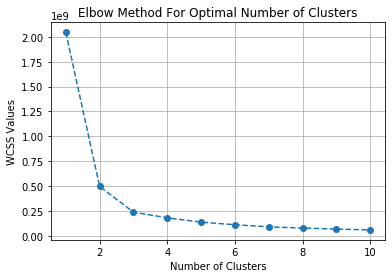

In [21]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.grid(True)
plt.show()

In [22]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans_model.fit_predict(X)

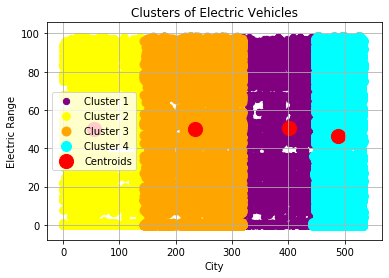

In [23]:
m = np.array(X)
plt.scatter(m[y_kmeans == 0, 0], m[y_kmeans == 0, 1], s=40, c='purple', label='Cluster 1')
plt.scatter(m[y_kmeans == 1, 0], m[y_kmeans == 1, 1], s=60, c='yellow', label='Cluster 2')
plt.scatter(m[y_kmeans == 2, 0], m[y_kmeans == 2, 1], s=80, c='orange', label='Cluster 3')
plt.scatter(m[y_kmeans == 3, 0], m[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Clusters of Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Electric Range')
plt.legend()
plt.grid(True)
plt.show()

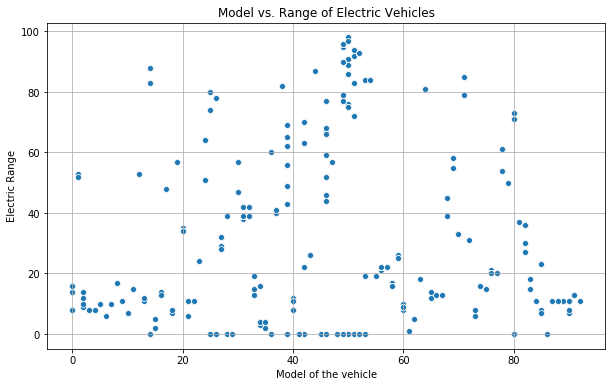

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Model', y='Electric Range')
plt.title('Model vs. Range of Electric Vehicles')
plt.xlabel('Model of the vehicle')
plt.ylabel('Electric Range')
plt.grid(True)
plt.show()


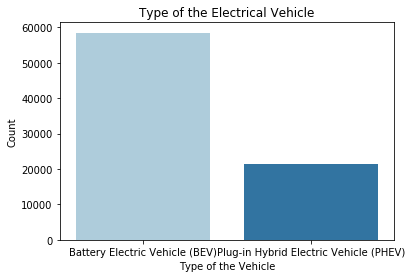

In [25]:
# Visualization based on profession
sns.countplot(data=data, x='Electric Vehicle Type',palette="Paired")
plt.title("Type of the Electrical Vehicle")
plt.xlabel('Type of the Vehicle')
plt.ylabel('Count')
plt.show()


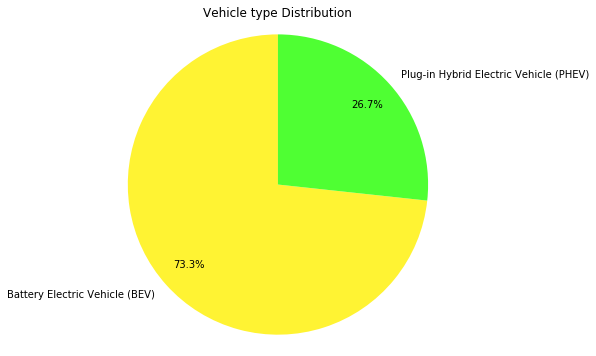

In [26]:
vehicle_counts = data['Electric Vehicle Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
colors = ['#FFF333','#4FFF33']
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(vehicle_counts,colors = colors, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90,pctdistance=0.80)
plt.title('Vehicle type Distribution')
plt.axis('equal')  
plt.show()

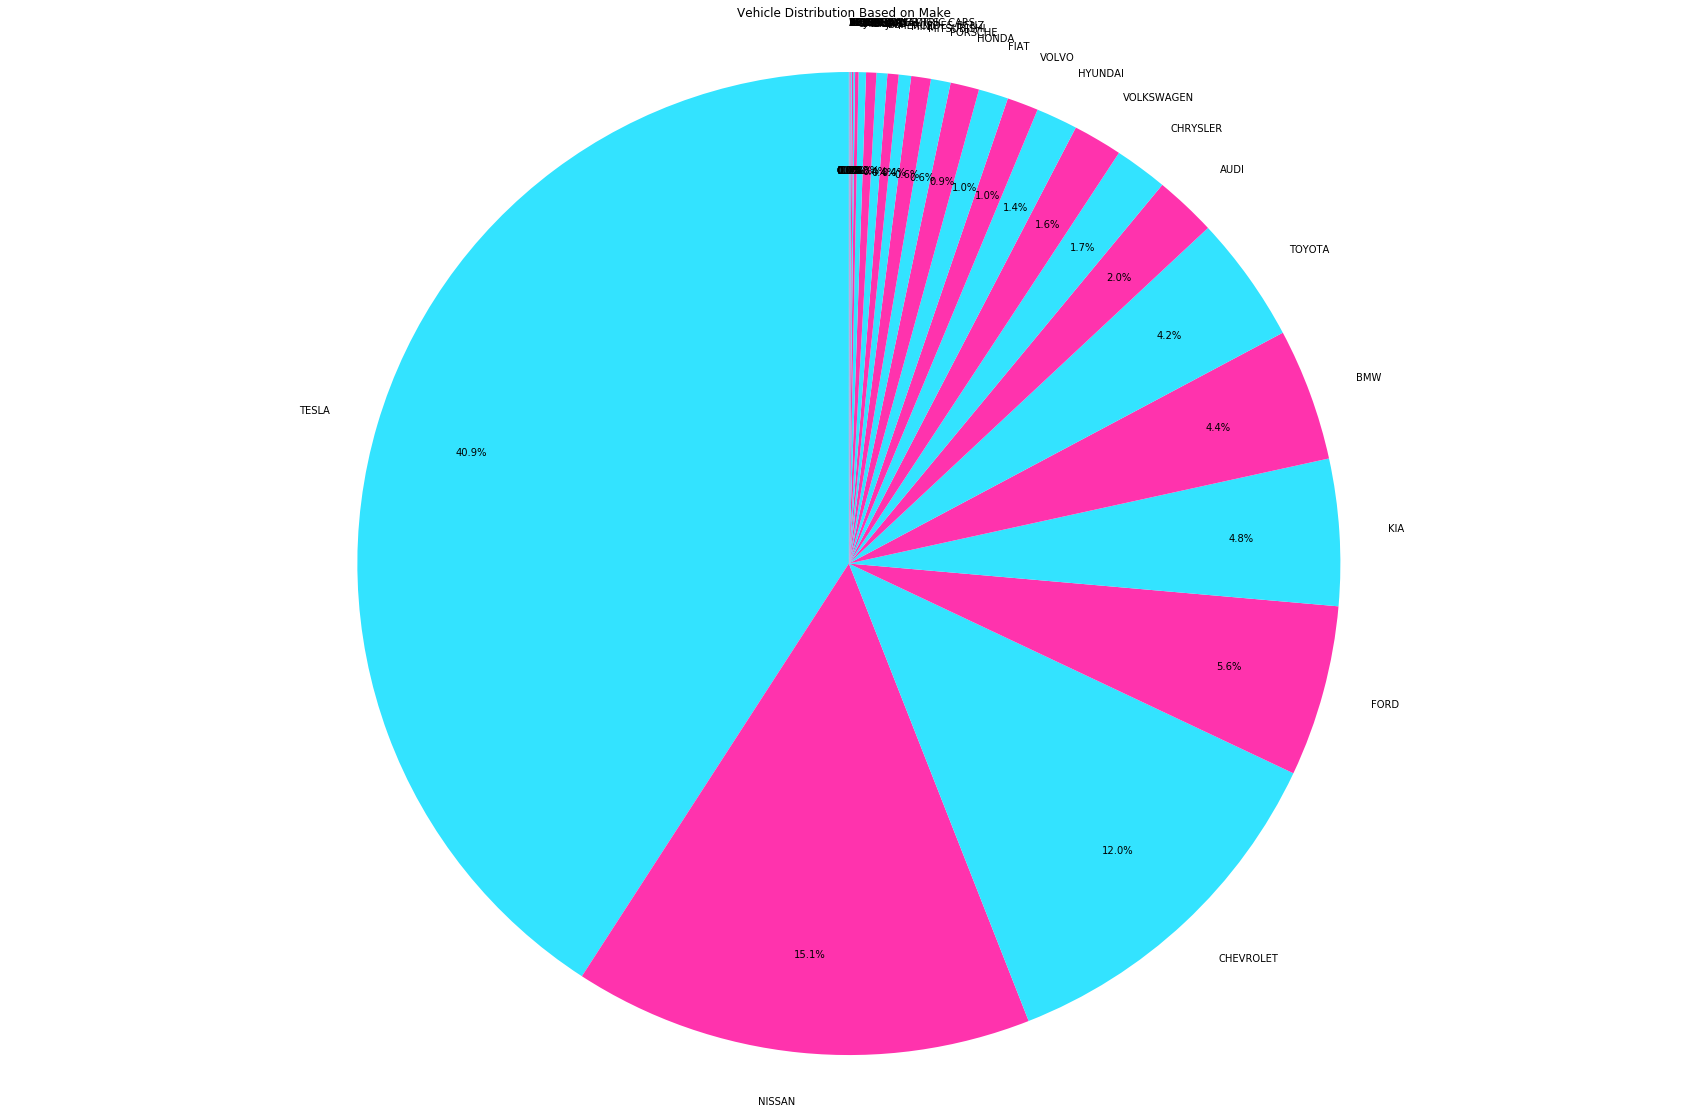

In [27]:
Make_counts = data['Make'].value_counts()

# Create a pie chart
plt.figure(figsize=(30, 20))  # Set the figure size
colors = ['#33E3FF','#FF33AD']
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(Make_counts,colors = colors, labels=Make_counts.index, autopct='%1.1f%%', startangle=90,pctdistance=0.80)
plt.title('Vehicle Distribution Based on Make')
plt.axis('equal')  
plt.show()

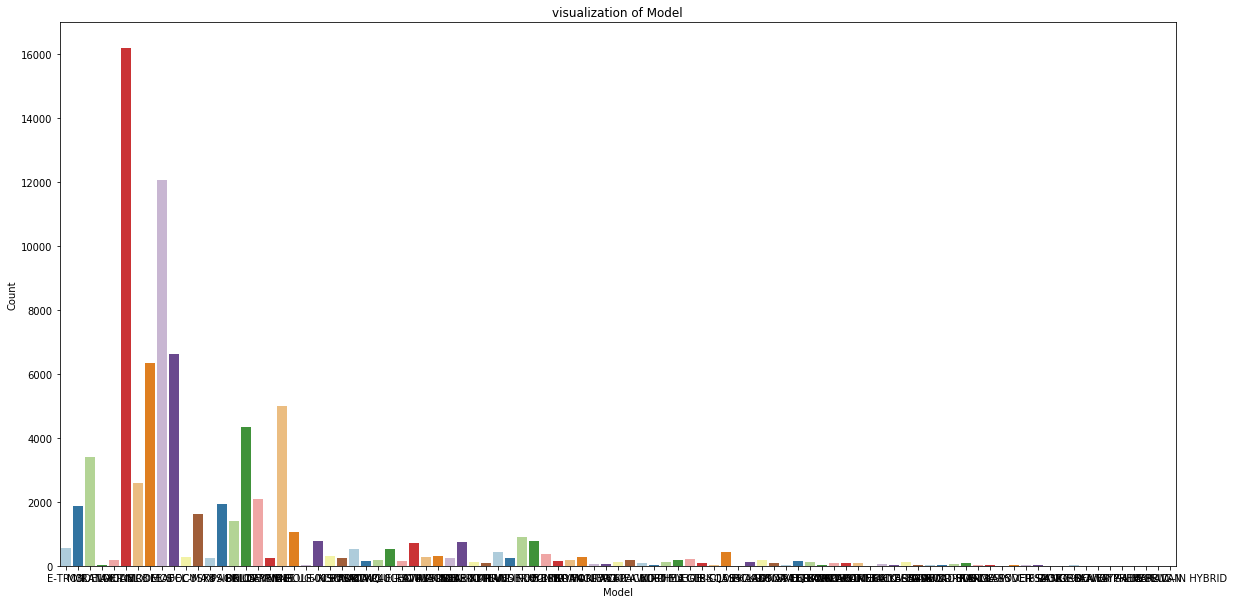

In [28]:
# Visualization based on Model
ax= plt.figure(figsize=(20,10))
sns.countplot(data=data, x='Model',palette="Paired")
plt.title("visualization of Model")
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()


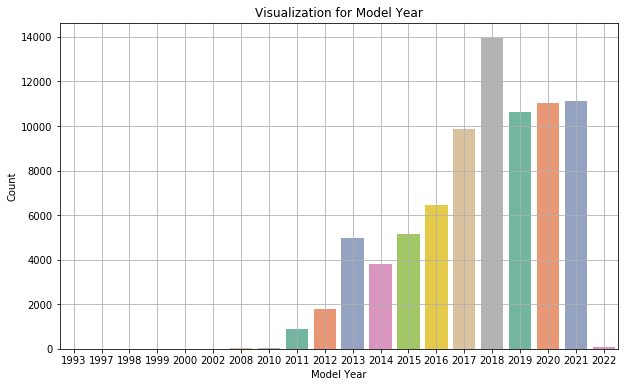

In [29]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Model Year', palette='Set2')
plt.title('Visualization for Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

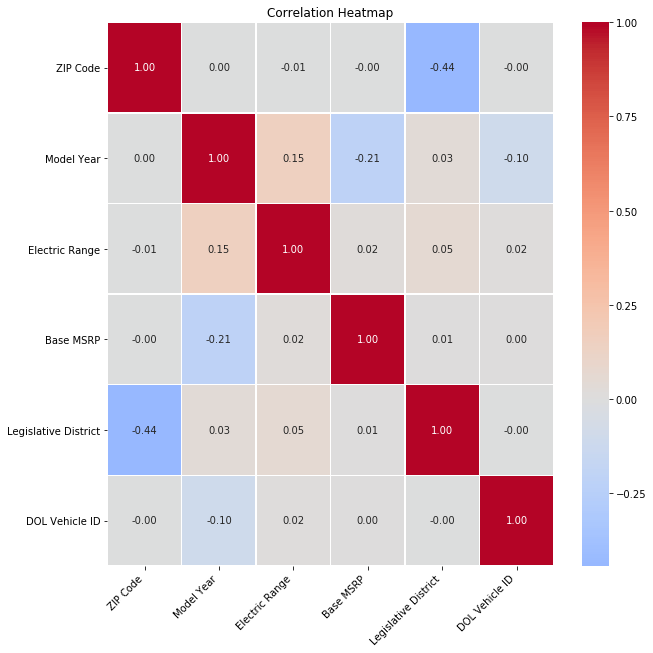

In [30]:

corr_matrix = data.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap')

# Create the heatmap with more customization
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:
# Separate features (X) and target (y)
X = df.drop('Model', axis=1)  # Drop the target column
y = df['Electric Vehicle Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Select the number of components that explain most of the variance (e.g., 95%)
num_components = 0
explained_variance_sum = 0
for i, ratio in enumerate(explained_variance_ratio):
    explained_variance_sum += ratio
    if explained_variance_sum >= 0.95:
        num_components = i + 1
        break

# Select the top features based on the selected number of components
top_features = X.columns[:num_components]

print("Selected top features:", top_features)

Selected top features: Index(['City', 'State', 'ZIP Code', 'Model Year', 'Make',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District'],
      dtype='object')


In [33]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
# Contains an array of explained variance ratios for each principal component.
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [9.9991874e-01 5.1249708e-05]
Cumulative variance explained by 2 principal components: 100.00%


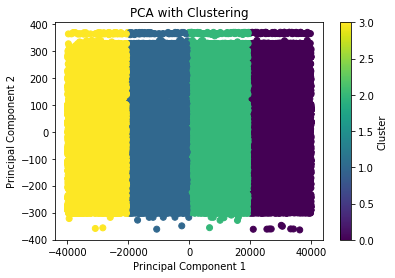

PCA Projection Axes:
[[-4.18885226e-06  3.71025306e-08 -2.64370568e-05 -1.92048853e-05
  -2.52777881e-06  7.93030768e-07  9.70950874e-07  5.95076661e-08
  -5.44389428e-05  3.49324402e-06 -2.69816301e-06  9.99999998e-01]
 [ 8.95443412e-01  1.33494206e-04  4.44973370e-01 -2.63604295e-04
  -3.16357265e-03  4.04523153e-04  1.33170843e-04  1.31177959e-04
  -7.71081140e-03 -3.43665325e-04 -1.04846263e-02  1.50542871e-05]]


In [34]:
# Perform clustering (for example, using KMeans with 3 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
# n_clusters specifies the number of clusters to create, and random_state is used to ensure reproducibility of the results.
clusters = kmeans.fit_predict(df)

# Plot the PCA results with different colors for each cluster
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
# c=clusters argument assigns a different color to each cluster in the plot, using the 'viridis' colormap.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Display projection axes (principal components)
print("PCA Projection Axes:")
# An attribute of the PCA instance that holds the principal components as row vectors
print(pca.components_)